# Parcial Series de tiempo (serie de tiempo ENERGIA)
---

     Owen D Jimenez
     Oscar J Layton

---

## Carga de datos

Para desarrollar una secuencia de pasos para el analisis de la serie de tiempo **energia** que hace parte de la base accidentes. Se hace necesario usar **Python** como herramienta computacional, en un primer paso se necesitaran de las siguientes librerias las cuales ayudaran para cargar los datos. 

In [224]:
import os
os.chdir("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos")

#import rpy2
import pandas as pd
import numpy as np
import scipy as sp
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot

Para obtener la serie, se convierte la informacion en un objeto de series de tiempo con la siguiente linea, asi mismo se procede a realizar su representacion grafica:

In [225]:
data2=pd.ExcelFile('parcialp.xlsx')
#print(data2.sheet_names)  #Nombres de las hojas de la base
data2=data2.parse('Hoja1') #Data Frame de la hoja "Datos"
data2.head()

,Periodo,energia
0,2000-01-01,79.346091
1,2000-02-01,77.678283
2,2000-03-01,82.763817
3,2000-04-01,78.349011
4,2000-05-01,82.953554


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Promedio deenergia mensual')

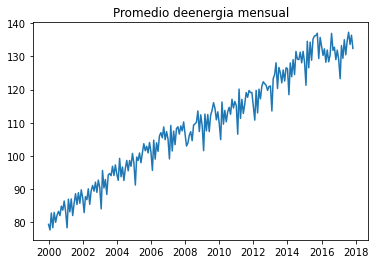

In [226]:
data2['Periodo']=pd.to_datetime(data2['Periodo'])###Sólo es necesario si no tiene formato de fecha
energia=data2.set_index('Periodo')
print(type(energia))


energiats=energia['energia']
print(type(energiats))
plt.plot(energiats)
plt.title('Promedio deenergia mensual') 
##%qtconsole

In [227]:
# ind = pd.date_range(start='1/1/2000', end='1/11/2017', freq='12M')
# accidentes = data2.set_index(ind)
# #accidentes2.head

In [228]:
# ts = accidentes['AUTP'] ; ts.head(10)

In [229]:
# ts.plot(figsize=(16,5))
# pyplot.show()

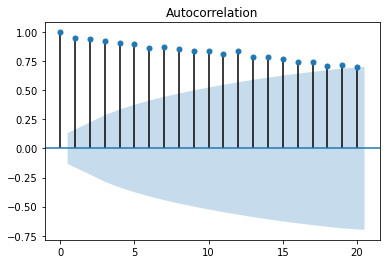

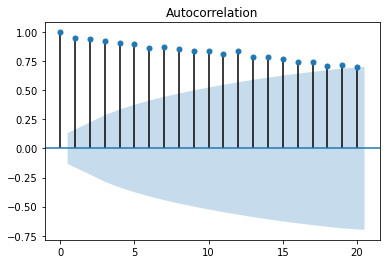

In [230]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
#acf(energiats,nlags=20,unbiased=False)
plot_acf(energiats, lags=20, unbiased=False)

Observando lo anterior, claramente la serie no es estacionaria, la serie no tiene una media constante al transcurrir los años **"la media no es la misma a lo largo del tiempo"**, asi mismo se logra observar una tendencia en los primeros años la cual aumenta aproximadamente hacia los ultimos años.

Observando la función de autocorrelación de la serie, se logra identificar que los rezagos salen de las bandas de confianza lo cual indica que está fuertemente correlacionada,es decir afirma el hecho de no ser estacionaria.

### Punto 2

En referencia a la serie de tiempo, se logra observar que a traves del tiempo la varianza alcanza a aumentar, dado lo anterior se ve la necesidad de estabilixar la varianza, en este orden de ideas se usara la transformacion **Box-Cox** el cual transforma los datos de la serie segun un lambda especifico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:

$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$


Este procedimiento puede ser usado rapidamente por medio del siguiente codigo:


In [231]:
#posdata = energiats[energiats > 0]   #hay un valor 0, se excluyó

import scipy.stats
sp.stats.boxcox(energiats,alpha=0.05)

(array([ 90.17977873,  88.18668948,  94.26939042,  88.98802577,
         94.49663252,  90.92958965,  93.50642929,  94.88939219,
         93.35003184,  96.75886536,  95.33213275,  98.61332768,
         94.79132055,  88.95039666,  99.27970943,  94.68792092,
         99.36820583,  93.37385068,  97.74045138, 101.26301712,
         97.34949083, 101.62139616,  97.7865784 , 102.66428569,
         99.74099507,  94.44273019, 100.19101577,  99.12406142,
        103.04025952,  97.41629676, 102.3177204 , 104.23944488,
        102.18984455, 105.45447253, 101.73140702, 106.19434778,
        103.56068455,  95.79915718, 109.67746629, 103.32537524,
        106.40372627, 100.98299249, 108.04890223, 108.58791992,
        107.79424022, 111.22087799, 107.87321435, 111.72080315,
        108.3905679 , 106.10322778, 114.09732777, 107.3955822 ,
        110.97344222, 106.04900399, 110.36274526, 113.34754697,
        109.57698134, 113.31343821, 111.20713763, 115.89701584,
        112.29664562, 104.40481219, 114.

Según lo anterior $\lambda=1.04$ y al ser muy cercano a 1 no se hace necesario una transformación BoxCox

In [232]:
# ts_azucar=sp.stats.boxcox(energiats,lmbda=1.04)  #haciendo la transformación Box-cox
# ts_azucar =pd.Series(ts_azucar,index=date_rng) 
# plt.plot(ts_azucar)

# Punto 3

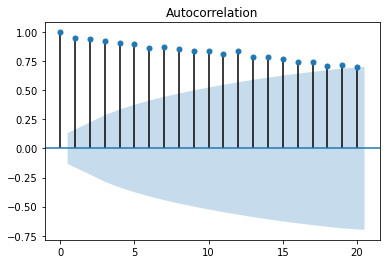

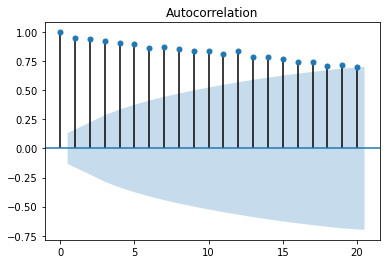

In [233]:
plot_acf(energiats, lags=20, unbiased=False)

Considerando la metodologia realizada en clase debe asumirse un número específico de rezagos en la función de autocorrelación para poder establecer el número de variables rezagadas  **(para ser usadas en el método de arboles de desición)**. Considerando lo anterior y observando que la función de Autocorrelación disminuye cada vez que sus rezagos se hacen más grandes, entonces se especificará un número de rezagos más altos que es aproximadamente 7.



# PUNTO 4

Periodo
2000-01-01     79.346091
2000-02-01     77.678283
2000-03-01     82.763817
2000-04-01     78.349011
2000-05-01     82.953554
                 ...    
2017-07-01    134.625487
2017-08-01    137.280345
2017-09-01    133.608195
2017-10-01    136.390707
2017-11-01    132.394834
Name: energia, Length: 215, dtype: float64


C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


Text(0, 0.5, 'resid')

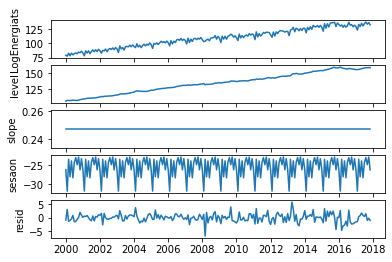

In [234]:
####Holt-Winters
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
print(energiats)
#print(pd.infer_freq(data['Month'], warn=True))
fit1 = ExponentialSmoothing(energiats, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=False)
####ejecutar desde la línea 74 hasta la 88
plt.subplot(5, 1, 1)
plt.plot(energiats)
plt.ylabel('LogEnergiats') 
plt.subplot(5, 1, 2)
plt.plot(fit1.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(fit1.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(fit1.season)
plt.ylabel('sesaon') 
plt.subplot(5, 1, 5)
plt.plot(fit1.resid)
plt.ylabel('resid')

In [292]:
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,3.051383e-01,True
smoothing_slope,beta,7.237395e-23,True
smoothing_seasonal,gamma,8.672884e-20,True
initial_level,l.0,1.061538e+02,True
initial_slope,b.0,2.472409e-01,True
initial_seasons.0,s.0,-2.613454e+01,True
initial_seasons.1,s.1,-3.177010e+01,True
initial_seasons.2,s.2,-2.342502e+01,True
initial_seasons.3,s.3,-2.801668e+01,True
initial_seasons.4,s.4,-2.386015e+01,True


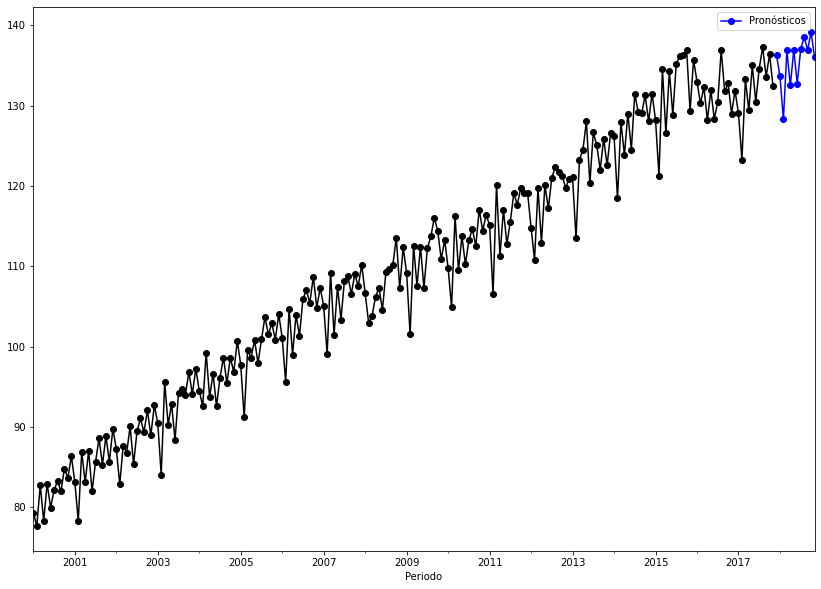

In [294]:
fcast1 = fit1.forecast(12).rename("Pronósticos")
ax = energiats.plot(color="black", marker="o", figsize=(14,10))
fcast1.plot(ax=ax, color='blue', marker="o", legend=True)

In [302]:
fcast1

2017-12-01    136.278474
2018-01-01    133.669166
2018-02-01    128.280846
2018-03-01    136.873168
2018-04-01    132.528744
2018-05-01    136.932517
2018-06-01    132.758280
2018-07-01    137.029263
2018-08-01    138.540332
2018-09-01    136.923050
2018-10-01    139.180148
2018-11-01    136.078777
Freq: MS, Name: Pronósticos, dtype: float64

## Arbol de decision

In [235]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np

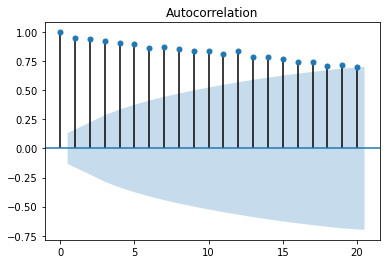

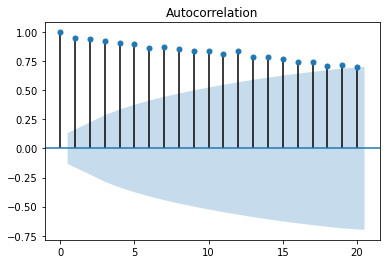

In [236]:
plot_acf(energiats, lags=20, unbiased=False)

#### Creando variables rezagadas
---

Aquí se procede a crear las covariables y se procede seguidamente a dividir el conjuntoi de dato en entrenamiento y de prueba. 

In [237]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [238]:
energiats.shift(2)

Periodo
2000-01-01           NaN
2000-02-01           NaN
2000-03-01     79.346091
2000-04-01     77.678283
2000-05-01     82.763817
                 ...    
2017-07-01    135.019965
2017-08-01    130.483785
2017-09-01    134.625487
2017-10-01    137.280345
2017-11-01    133.608195
Name: energia, Length: 215, dtype: float64

In [239]:
for i in range(7,0,-1):
    df1[['t-'+str(i)]] = energia.shift(i)
    
# for i in range(370,364,-1):   
#     df1[['t-'+str(i)]] = energiats.shift(i)
# print(df1)

In [240]:
# Create column t y añadiendola 
df1['t'] = energia.values
print(df1.head(13))

                  t-7        t-6        t-5        t-4        t-3        t-2  \
Periodo                                                                        
2000-01-01        NaN        NaN        NaN        NaN        NaN        NaN   
2000-02-01        NaN        NaN        NaN        NaN        NaN        NaN   
2000-03-01        NaN        NaN        NaN        NaN        NaN  79.346091   
2000-04-01        NaN        NaN        NaN        NaN  79.346091  77.678283   
2000-05-01        NaN        NaN        NaN  79.346091  77.678283  82.763817   
2000-06-01        NaN        NaN  79.346091  77.678283  82.763817  78.349011   
2000-07-01        NaN  79.346091  77.678283  82.763817  78.349011  82.953554   
2000-08-01  79.346091  77.678283  82.763817  78.349011  82.953554  79.973158   
2000-09-01  77.678283  82.763817  78.349011  82.953554  79.973158  82.126648   
2000-10-01  82.763817  78.349011  82.953554  79.973158  82.126648  83.281450   
2000-11-01  78.349011  82.953554  79.973

In [241]:
#quitando los NaN
# Create a new subsetted dataframe, removing Nans from first 370 rows
df1_PM25 = df1[8:]
print(df1_PM25)
df1_PM25.size

                   t-7         t-6         t-5         t-4         t-3  \
Periodo                                                                  
2000-09-01   77.678283   82.763817   78.349011   82.953554   79.973158   
2000-10-01   82.763817   78.349011   82.953554   79.973158   82.126648   
2000-11-01   78.349011   82.953554   79.973158   82.126648   83.281450   
2000-12-01   82.953554   79.973158   82.126648   83.281450   81.996011   
2001-01-01   79.973158   82.126648   83.281450   81.996011   84.841460   
...                ...         ...         ...         ...         ...   
2017-07-01  131.878500  129.036272  123.275306  133.257830  129.428747   
2017-08-01  129.036272  123.275306  133.257830  129.428747  135.019965   
2017-09-01  123.275306  133.257830  129.428747  135.019965  130.483785   
2017-10-01  133.257830  129.428747  135.019965  130.483785  134.625487   
2017-11-01  129.428747  135.019965  130.483785  134.625487  137.280345   

                   t-2         t-1   

1656

#### Dividir los datos 
---
Se procede a partir los datos en dos partes, uno en el conjunto donde están las covariables y otro donde se encuentra la variable a predecir.  

In [242]:
# Split data

PM25split = df1_PM25.values
# split into lagged variables and original time series
X1= PM25split[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =PM25split[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [243]:
print(X1)
print(y1)

[[ 77.67828261  82.76381718  78.34901148 ...  79.97315786  82.12664804
   83.2814496 ]
 [ 82.76381718  78.34901148  82.95355433 ...  82.12664804  83.2814496
   81.99601148]
 [ 78.34901148  82.95355433  79.97315786 ...  83.2814496   81.99601148
   84.8414599 ]
 ...
 [123.27530649 133.25783036 129.42874708 ... 130.48378506 134.62548666
  137.28034495]
 [133.25783036 129.42874708 135.01996462 ... 134.62548666 137.28034495
  133.60819515]
 [129.42874708 135.01996462 130.48378506 ... 137.28034495 133.60819515
  136.39070741]]
[ 81.99601148  84.8414599   83.65100822  86.38778764  83.19957948
  78.31752069  86.94316742  83.11325799  87.01691169  82.01590756
  85.66008916  88.59525421  85.33407189  88.89364756  85.69855058
  89.76174553  87.32752992  82.90854986  87.70243943  86.81345934
  90.07462074  85.38978414  89.47330387  91.07225454  89.36686492
  92.08261302  88.98523653  92.69763564  90.50763112  84.04076452
  95.59076553  90.3118567   92.87165159  88.3620717   94.23850784
  94.686161

In [244]:
print(X1[1])
print(y1[1])

[82.76381718 78.34901148 82.95355433 79.97315786 82.12664804 83.2814496
 81.99601148]
84.84145990211903


In [245]:
# Target Train-Test split
from pandas import read_csv

Y1 = y1
traintarget_size = int(len(Y1)* 0.706 )   # Set split, este porcentaje tan raro es para que coincida con el del ejemplo de R.
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

print('Observations for Target: %d' % (len(Y1)* 0.706))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 146
Training Observations for Target: 146
Testing Observations for Target: 61


In [246]:
# Features Train-Test split

trainfeature_size = int(len(X1)* 0.706 )
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]   ##Regresoras
print('Observations for feature: %d' % (len(X1)* 0.706))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 146
Training Observations for feature: 146
Testing Observations for feature: 61


In [247]:
# Decision Tree Regresion Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_PM25 = DecisionTreeRegressor()  # max-depth not set


In [248]:

# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_PM25.fit(train_feature, train_target)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [249]:
# Check the score on train and test
print(decision_tree_PM25.score(train_feature, train_target))
print(decision_tree_PM25.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0

1.0
-2.5887826946068917


In [281]:
# Find the best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3, 4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_PM25 = DecisionTreeRegressor(max_depth=d)
    decision_tree_PM25.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_PM25.score(train_feature, train_target))
    print(decision_tree_PM25.score(test_feature, test_target), '\n')  # You want the test score to be positive and high

max_depth= 2
0.8792650696976437
-6.560263108316789 

max_depth= 3
0.9242929395343048
-3.9203412741485426 

max_depth= 4
0.9498314746320414
-1.9933062751488948 

max_depth= 5
0.9669756738147062
-2.3388474531602745 

max_depth= 7
0.9939679598228532
-2.177407569043162 

max_depth= 8
0.9987392321667229
-2.5827230858949752 

max_depth= 10
0.9999624266340605
-2.586669398360173 



No obstante el mejor valor lo está determinando max_depth= 4 con un valor de -2.8 fuera de la muestra

    max_depth= 4
    0.9559138864666499
    -2.8527984733472516

In [282]:
from sklearn import tree

listacaract=list(df1_PM25.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_PM25)
print(text_representation)

|--- feature_5 <= 100.90
|   |--- feature_0 <= 89.92
|   |   |--- feature_2 <= 85.36
|   |   |   |--- feature_0 <= 88.07
|   |   |   |   |--- feature_1 <= 82.06
|   |   |   |   |   |--- feature_3 <= 81.63
|   |   |   |   |   |   |--- value: [84.84]
|   |   |   |   |   |--- feature_3 >  81.63
|   |   |   |   |   |   |--- feature_0 <= 83.12
|   |   |   |   |   |   |   |--- value: [86.39]
|   |   |   |   |   |   |--- feature_0 >  83.12
|   |   |   |   |   |   |   |--- value: [86.94]
|   |   |   |   |--- feature_1 >  82.06
|   |   |   |   |   |--- feature_3 <= 85.25
|   |   |   |   |   |   |--- feature_6 <= 83.24
|   |   |   |   |   |   |   |--- value: [78.32]
|   |   |   |   |   |   |--- feature_6 >  83.24
|   |   |   |   |   |   |   |--- feature_5 <= 82.06
|   |   |   |   |   |   |   |   |--- value: [83.65]
|   |   |   |   |   |   |   |--- feature_5 >  82.06
|   |   |   |   |   |   |   |   |--- feature_2 <= 83.24
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 82.62
|   |   |   |  

In [285]:
print(train_prediction.size)
print(train_target.size)

print(test_prediction.size)
print(test_target.size)

146
146
61
61


In [289]:
indicetrian_test=df1_PM25.index
print(indicetrian_test.size)  ###Tamaño del índice
indicetrain=indicetrian_test[0:146]
indicetest=indicetrian_test[146:207]

207


In [290]:
targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

207
207


Según la poda el numero óptimo de hojas es de 4.

In [291]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_test)
ObsvsPred.head(10)

,observado,Predicción
Periodo,,
2000-09-01,81.996011,81.606625
2000-10-01,84.841460,81.606625
2000-11-01,83.651008,81.606625
2000-12-01,86.387788,81.606625
2001-01-01,83.199579,81.606625
2001-02-01,78.317521,81.606625
2001-03-01,86.943167,81.606625
2001-04-01,83.113258,81.606625
2001-05-01,87.016912,81.606625


## Redes neuronales

In [303]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [304]:
from pandas import DataFrame
# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [305]:
for i in range(7,0,-1):
    df1[['t-'+str(i)]] = energia.shift(i)

In [306]:
print(df1)

                   t-7         t-6         t-5         t-4         t-3  \
Periodo                                                                  
2000-01-01         NaN         NaN         NaN         NaN         NaN   
2000-02-01         NaN         NaN         NaN         NaN         NaN   
2000-03-01         NaN         NaN         NaN         NaN         NaN   
2000-04-01         NaN         NaN         NaN         NaN   79.346091   
2000-05-01         NaN         NaN         NaN   79.346091   77.678283   
...                ...         ...         ...         ...         ...   
2017-07-01  131.878500  129.036272  123.275306  133.257830  129.428747   
2017-08-01  129.036272  123.275306  133.257830  129.428747  135.019965   
2017-09-01  123.275306  133.257830  129.428747  135.019965  130.483785   
2017-10-01  133.257830  129.428747  135.019965  130.483785  134.625487   
2017-11-01  129.428747  135.019965  130.483785  134.625487  137.280345   

                   t-2         t-1  


In [307]:
# Create column t
df1['t'] = energia.values
print(df1.head(7))

            t-7        t-6        t-5        t-4        t-3        t-2  \
Periodo                                                                  
2000-01-01  NaN        NaN        NaN        NaN        NaN        NaN   
2000-02-01  NaN        NaN        NaN        NaN        NaN        NaN   
2000-03-01  NaN        NaN        NaN        NaN        NaN  79.346091   
2000-04-01  NaN        NaN        NaN        NaN  79.346091  77.678283   
2000-05-01  NaN        NaN        NaN  79.346091  77.678283  82.763817   
2000-06-01  NaN        NaN  79.346091  77.678283  82.763817  78.349011   
2000-07-01  NaN  79.346091  77.678283  82.763817  78.349011  82.953554   

                  t-1          t  
Periodo                           
2000-01-01        NaN  79.346091  
2000-02-01  79.346091  77.678283  
2000-03-01  77.678283  82.763817  
2000-04-01  82.763817  78.349011  
2000-05-01  78.349011  82.953554  
2000-06-01  82.953554  79.973158  
2000-07-01  79.973158  82.126648  


In [308]:
# Create a new subsetted dataframe, removing Nans from first 7 rows
df1_PRES = df1[7:]
print(df1_PRES.head(20))
df1_PRES.shape

                  t-7        t-6        t-5        t-4        t-3        t-2  \
Periodo                                                                        
2000-08-01  79.346091  77.678283  82.763817  78.349011  82.953554  79.973158   
2000-09-01  77.678283  82.763817  78.349011  82.953554  79.973158  82.126648   
2000-10-01  82.763817  78.349011  82.953554  79.973158  82.126648  83.281450   
2000-11-01  78.349011  82.953554  79.973158  82.126648  83.281450  81.996011   
2000-12-01  82.953554  79.973158  82.126648  83.281450  81.996011  84.841460   
2001-01-01  79.973158  82.126648  83.281450  81.996011  84.841460  83.651008   
2001-02-01  82.126648  83.281450  81.996011  84.841460  83.651008  86.387788   
2001-03-01  83.281450  81.996011  84.841460  83.651008  86.387788  83.199579   
2001-04-01  81.996011  84.841460  83.651008  86.387788  83.199579  78.317521   
2001-05-01  84.841460  83.651008  86.387788  83.199579  78.317521  86.943167   
2001-06-01  83.651008  86.387788  83.199

(208, 8)

#### Dividir los datos en repuestas y Covariables, entrenamiento, validación y prueba.

X1 serán las covariables que se considerarán en el proceso de aprendizaje. Además y1 es la última variable que es la variable respuesta *PRES*

In [309]:
# Split data

PRESsplit = df1_PRES.values
# split into lagged variables and original time series
X1= PRESsplit[:, 0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y1 =PRESsplit[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [310]:
print(X1)
print(y1)

[[ 79.34609129  77.67828261  82.76381718 ...  82.95355433  79.97315786
   82.12664804]
 [ 77.67828261  82.76381718  78.34901148 ...  79.97315786  82.12664804
   83.2814496 ]
 [ 82.76381718  78.34901148  82.95355433 ...  82.12664804  83.2814496
   81.99601148]
 ...
 [123.27530649 133.25783036 129.42874708 ... 130.48378506 134.62548666
  137.28034495]
 [133.25783036 129.42874708 135.01996462 ... 134.62548666 137.28034495
  133.60819515]
 [129.42874708 135.01996462 130.48378506 ... 137.28034495 133.60819515
  136.39070741]]
[ 83.2814496   81.99601148  84.8414599   83.65100822  86.38778764
  83.19957948  78.31752069  86.94316742  83.11325799  87.01691169
  82.01590756  85.66008916  88.59525421  85.33407189  88.89364756
  85.69855058  89.76174553  87.32752992  82.90854986  87.70243943
  86.81345934  90.07462074  85.38978414  89.47330387  91.07225454
  89.36686492  92.08261302  88.98523653  92.69763564  90.50763112
  84.04076452  95.59076553  90.3118567   92.87165159  88.3620717
  94.2385078

Primero dividiremos nuestro conjunto de datos en entrenamiento(93%) y prueba(10%), luego el entrenamiento será dividido en entrenamiento(80% del 90%) y validación(20% del 90%).

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Considérese que en la división de datos en *entrenamiento* y en *prueba* no se consideró una partición aleatoria puesto que la forma en que están construida la información tiene una estructura de correlación temporal. (no aleatorio)

In [312]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.1, train_size=0.9) #Divide en entrenamient-prueba

In [313]:
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(187, 7)
(21, 7)
(187,)
(21,)


División de datos en entrenamiento en dos:  uno de *entrenamiento* nuevamente y otro de *validación* 

In [314]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.1, train_size=0.9) #Div en entrenam-val

In [315]:
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(168, 7)
(19, 7)
(168,)
(19,)


# Usando MinMaxScaler para las covariables únicamente

Note que para éste caso se elige MinMaxScaler, es decir, transforma todas las variables a que tomen valores entre 0 y 1. Vale la pena decir que esta transformación es basada en el conjuto de entrenamiento, y aplicada con esos parámetros(Min y Max), a los tres conjuntos entrnamiento , validación y prueba.

In [316]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [317]:
X_train

array([[0.21303141, 0.2561955 , 0.17122005, ..., 0.25673924, 0.26642992,
        0.26907416],
       [0.5670705 , 0.66373543, 0.58762897, ..., 0.68281163, 0.66751773,
        0.68227478],
       [0.47717477, 0.49470329, 0.46250441, ..., 0.43452453, 0.49198578,
        0.41755697],
       ...,
       [0.59486474, 0.71564461, 0.66289374, ..., 0.73931146, 0.73644761,
        0.71048508],
       [0.27567704, 0.32364387, 0.26890267, ..., 0.25387938, 0.24259999,
        0.31221918],
       [0.54960786, 0.59977719, 0.6191649 , ..., 0.64741878, 0.61260284,
        0.6222763 ]])

In [318]:
import tensorflow.keras as keras

# Red Nueronal con una 3 Capas ocultas

La siguiente es la configuración de una red neuronal con tres capas ocultas.
    

In [319]:
# Aquí se considerarán funciones de activación lineales para ver un ajuste lineal (no tan buen ajuste)
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="tanh")(input_layer)
hidden2 = keras.layers.Dense(32,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(32,activation="linear")(hidden2)
#dropout_layer = keras.layers.Dropout(0.2)(hidden3)         #dejando el 20% de neuronas por fuera
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)   #1 nodo por ser rta univariada

In [320]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 7)]               0         
_________________________________________________________________
dense_72 (Dense)             (None, 32)                256       
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_74 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 33        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


### Aprendizaje

In [321]:
ts_model.compile(loss="mean_squared_error",optimizer="sgd")
history=ts_model.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Train on 168 samples, validate on 19 samples
Epoch 1/100
168/168 [==============================] - 1s 4ms/sample - loss: nan - val_loss: nan
Epoch 2/100
168/168 [==============================] - 0s 274us/sample - loss: nan - val_loss: nan
Epoch 3/100
168/168 [==============================] - 0s 214us/sample - loss: nan - val_loss: nan
Epoch 4/100
168/168 [==============================] - 0s 202us/sample - loss: nan - val_loss: nan
Epoch 5/100
168/168 [==============================] - 0s 167us/sample - loss: nan - val_loss: nan
Epoch 6/100
168/168 [==============================] - 0s 196us/sample - loss: nan - val_loss: nan
Epoch 7/100
168/168 [==============================] - 0s 149us/sample - loss: nan - val_loss: nan
Epoch 8/100
168/168 [==============================] - 0s 167us/sample - loss: nan - val_loss: nan
Epoch 9/100
168/168 [==============================] - 0s 167us/sample - loss: nan - val_loss: nan
Epoch 10/100
168/168 [==============================] - 0s 137us/s

168/168 [==============================] - 0s 196us/sample - loss: nan - val_loss: nan
Epoch 83/100
168/168 [==============================] - 0s 220us/sample - loss: nan - val_loss: nan
Epoch 84/100
168/168 [==============================] - 0s 184us/sample - loss: nan - val_loss: nan
Epoch 85/100
168/168 [==============================] - 0s 202us/sample - loss: nan - val_loss: nan
Epoch 86/100
168/168 [==============================] - 0s 256us/sample - loss: nan - val_loss: nan
Epoch 87/100
168/168 [==============================] - 0s 190us/sample - loss: nan - val_loss: nan
Epoch 88/100
168/168 [==============================] - 0s 214us/sample - loss: nan - val_loss: nan
Epoch 89/100
168/168 [==============================] - 0s 119us/sample - loss: nan - val_loss: nan
Epoch 90/100
168/168 [==============================] - 0s 178us/sample - loss: nan - val_loss: nan
Epoch 91/100
168/168 [==============================] - 0s 155us/sample - loss: nan - val_loss: nan
Epoch 92/100
